2021-07-27 <br/>
Olympic Medals <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-07-27/readme.md <br/>

Bar Plot - Complete <br/>
Professional Line Chart  - Complete <br/>



In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv')

In [4]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [6]:
#Split Medal
df['Gold'] = df['medal'].apply(lambda x: 1 if x == 'Gold' else 0)
df['Silver'] = df['medal'].apply(lambda x: 1 if x == 'Silver' else 0)
df['Bronze'] = df['medal'].apply(lambda x: 1 if x == 'Bronze' else 0)

In [7]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,Gold,Silver,Bronze
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0


## Which country had the most medals (Overall)


In [8]:
medals=df.groupby(['noc'])[['Gold','Silver','Bronze']].sum().reset_index()

In [9]:
def add_ranking(df):
    return ((df['Gold'] * 3) + (df['Silver'] * 2) + (df['Bronze'] * 1))

In [10]:
#Add medal ranking 
medals['Ranking']= medals[['Gold','Silver','Bronze']].apply(lambda x:add_ranking(x), axis=1)

In [11]:
medals.head()

,noc,Gold,Silver,Bronze,Ranking
0,AFG,0,0,2,2
1,AHO,0,1,0,2
2,ALB,0,0,0,0
3,ALG,5,4,8,31
4,AND,0,0,0,0


In [12]:
medals.loc[medals.noc=='USA']

,noc,Gold,Silver,Bronze,Ranking
216,USA,2638,1641,1358,12554


Text(0.5, 1.0, 'Total Gold Medals Won')

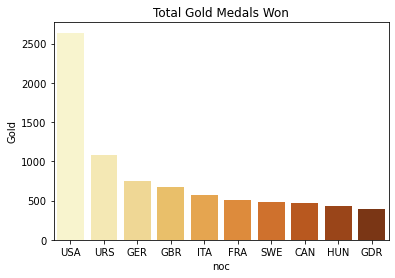

In [13]:
# Top 10 Gold medals 
sns.barplot(y="Gold",x='noc', data=medals, palette="YlOrBr",
              order=medals.sort_values('Gold',ascending = False).noc[:10])
plt.title("Total Gold Medals Won")


Text(0.5, 1.0, 'Total Silver Medals Won')

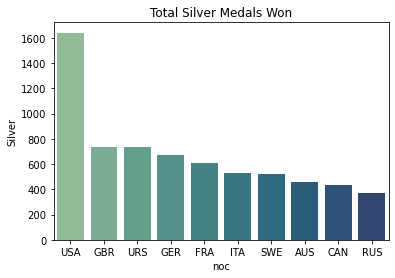

In [14]:
# Top 10 Silver medals 
sns.barplot(y="Silver",x='noc', data=medals, palette="crest",
              order=medals.sort_values('Silver',ascending = False).noc[:10])
plt.title("Total Silver Medals Won")

Text(0.5, 1.0, 'Total Bronze Medals Won')

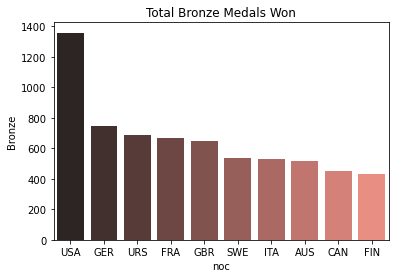

In [15]:
# Top 10 Bronze medals 
sns.barplot(y="Bronze",x='noc', data=medals, palette="dark:salmon",
              order=medals.sort_values('Bronze',ascending = False).noc[:10])
plt.title("Total Bronze Medals Won")

Text(0.5, 1.0, 'Combined Medals Won (Weighted)')

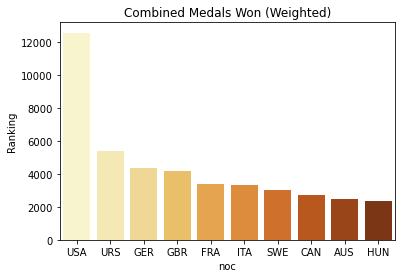

In [16]:
# Top 10 Overall Ranking
sns.barplot(y="Ranking",x='noc', data=medals, palette="YlOrBr",
              order=medals.sort_values('Ranking',ascending = False).noc[:10])
plt.title("Combined Medals Won (Weighted)")

## How many medals each year (Overall & US)

In [17]:
timeline=df.groupby(['year','noc'])[['Gold','Silver','Bronze']].sum().reset_index()

In [18]:
timeline['Ranking']= timeline[['Gold','Silver','Bronze']].apply(lambda x:add_ranking(x), axis=1)

In [19]:
timeline.head()

,year,noc,Gold,Silver,Bronze,Ranking
0,1896,AUS,2,0,1,7
1,1896,AUT,2,1,2,10
2,1896,DEN,1,2,3,10
3,1896,FRA,5,4,2,25
4,1896,GBR,3,3,3,18


In [20]:
avg_ranked=timeline.groupby(['year'])['Ranking'].mean().reset_index()

In [21]:
avg_ranked.head()

,year,Ranking
0,1896,25.833333
1,1900,39.806452
2,1904,66.333333
3,1906,44.190476
4,1908,77.272727


Text(0.5, 1.0, 'Comparing Medals over time')

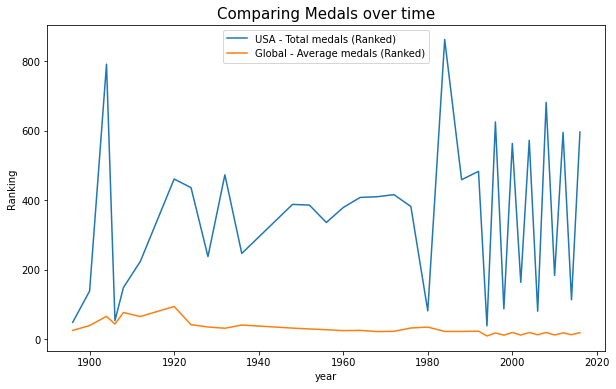

In [22]:
line,ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=timeline.loc[timeline.noc=='USA'], x="year", y="Ranking")
ax=sns.lineplot(data=avg_ranked, x="year", y="Ranking")
ax.legend(['USA - Total medals (Ranked)', 'Global - Average medals (Ranked)'],loc='upper center')
ax.set_title("Comparing Medals over time", fontsize=15)